# **Brain Tumor Classification using CNN**




A deep learning-based approach for classifying brain tumors using a Convolutional Neural Network (CNN). The model is trained on MRI images to classify brain tumors into four categories: glioma, meningioma, pituitary tumor, and no tumor.

**STEP 1: IMPORTING ALL THE NECESARY LIBRARIES:**

In [13]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, preprocessing
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


 **STEP 2:DATASET PREPARATION**

In [14]:
# Mount Google Drive
drive.mount('/content/drive')

# Define dataset path
dataset_path = '/content/drive/MyDrive/Brain_Tumor_Dataset.zip'
extract_path = '/content/brain_tumor_data'

# Extract dataset
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Define directories
train_dir = os.path.join(extract_path, 'Training')
test_dir = os.path.join(extract_path, 'Testing')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**STEP 3:LOADING AND PREPROCESSING THE DATASET**

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


<ipython-input-15-ad7f5a71e75e>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_labels, y=train_counts, palette='Blues')
<ipython-input-15-ad7f5a71e75e>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_labels, y=test_counts, palette='Greens')


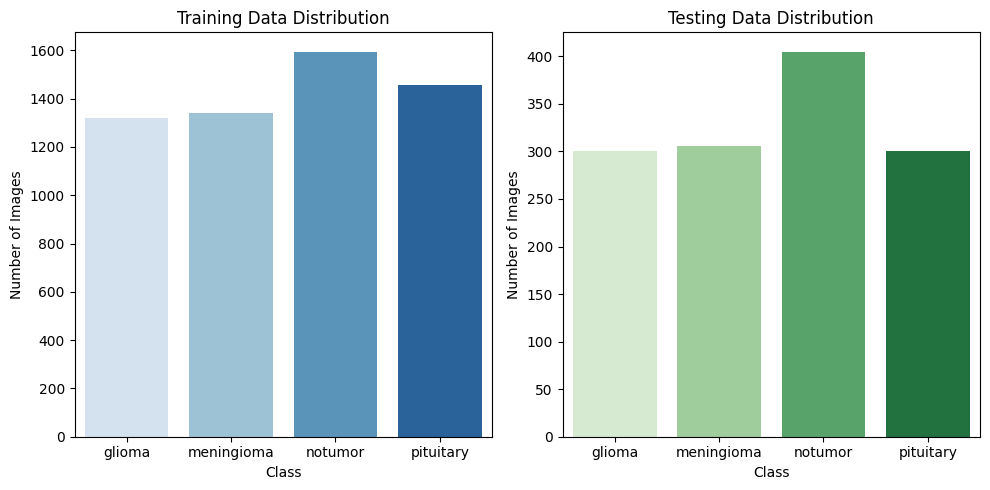

In [15]:
# Image preprocessing and augmentation
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
train_generator = datagen.flow_from_directory(train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
test_generator = datagen.flow_from_directory(test_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')

import seaborn as sns

# Get class labels and number of images per class
class_labels = list(train_generator.class_indices.keys())

# Count images in each class
train_counts = [len(os.listdir(os.path.join(train_dir, class_name))) for class_name in class_labels]
test_counts = [len(os.listdir(os.path.join(test_dir, class_name))) for class_name in class_labels]

# Plot bar graph
plt.figure(figsize=(10, 5))

# Training data
plt.subplot(1, 2, 1)
sns.barplot(x=class_labels, y=train_counts, palette='Blues')
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Training Data Distribution")

# Testing data
plt.subplot(1, 2, 2)
sns.barplot(x=class_labels, y=test_counts, palette='Greens')
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Testing Data Distribution")

plt.tight_layout()
plt.show()


**STEP 4: VISUALIZING IMAGES FOR EACH TUMOR TYPES:**

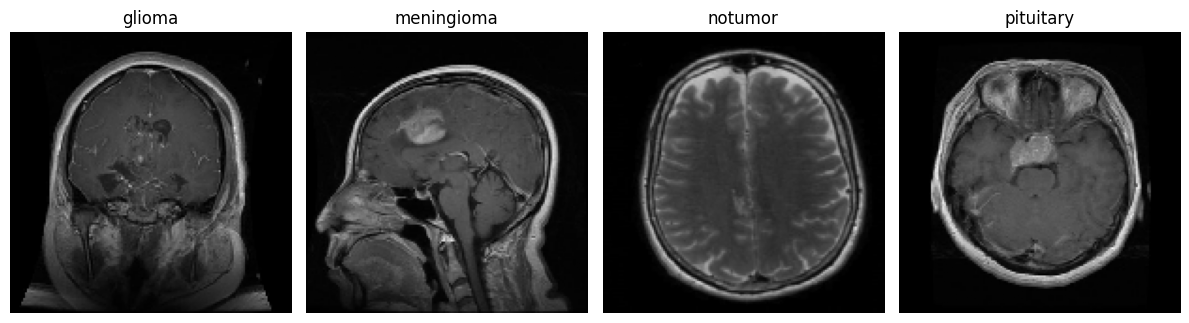

In [16]:
import random
import matplotlib.pyplot as plt

# Get class labels
class_labels = list(train_generator.class_indices.keys())

# Set up plot
plt.figure(figsize=(12, 6))

# Display one image from each class
for i, class_name in enumerate(class_labels):
    # Get all image filenames for the class
    class_path = os.path.join(train_dir, class_name)
    image_files = os.listdir(class_path)

    # Randomly select an image
    random_image = random.choice(image_files)
    image_path = os.path.join(class_path, random_image)

    # Load and display the image
    img = load_img(image_path, target_size=IMG_SIZE)
    img_array = img_to_array(img) / 255.0  # Normalize
    plt.subplot(1, 4, i + 1)
    plt.imshow(img_array)
    plt.axis('off')
    plt.title(class_name)

plt.tight_layout()
plt.show()


**STEP 5: BUILDING THE MODEL ARTITECHURE AND COMPILE THE MODEL**

In [17]:
# === Define Functional Model ===
inputs = layers.Input(shape=(150, 150, 3))

x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(4, activation='softmax')(x)

model = models.Model(inputs, outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,035,716 (72.62 MB)

 Trainable params: 19,035,716 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

**STEP 6:TRAIN THE MODEL**

In [18]:
# Train the model
EPOCHS = 25
history = model.fit(train_generator, validation_data=test_generator, epochs=EPOCHS)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 68s 340ms/step - accuracy: 0.5132 - loss: 1.1652 - val_accuracy: 0.7315 - val_loss: 0.6887
Epoch 2/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 70s 304ms/step - accuracy: 0.7315 - loss: 0.6582 - val_accuracy: 0.7513 - val_loss: 0.5853
Epoch 3/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 52s 289ms/step - accuracy: 0.7987 - loss: 0.5203 - val_accuracy: 0.7681 - val_loss: 0.5409
Epoch 4/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 52s 291ms/step - accuracy: 0.8211 - loss: 0.4655 - val_accuracy: 0.7796 - val_loss: 0.5453
Epoch 5/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 49s 276ms/step - accuracy: 0.8398 - loss: 0.4101 - val_accuracy: 0.8169 - val_loss: 0.4367
Epoch 6/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 51s 287ms/step - accuracy: 0.8429 - loss: 0.3928 - val_accuracy: 0.8124 - val_loss: 0.4190
Epoch 7/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 51s 287ms/step - accuracy: 0.8668 - loss: 0.3351 - val_accuracy: 0.8528 - val_loss: 0.3634
Epoch 8/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 50s 277ms/step - accuracy: 0.8890 - loss: 0

STEP 7:EVALUATE THE MODEL AND VISUALIZE THROUGH GRAPH

Final Training Accuracy: 0.96
Final Validation Accuracy: 0.94


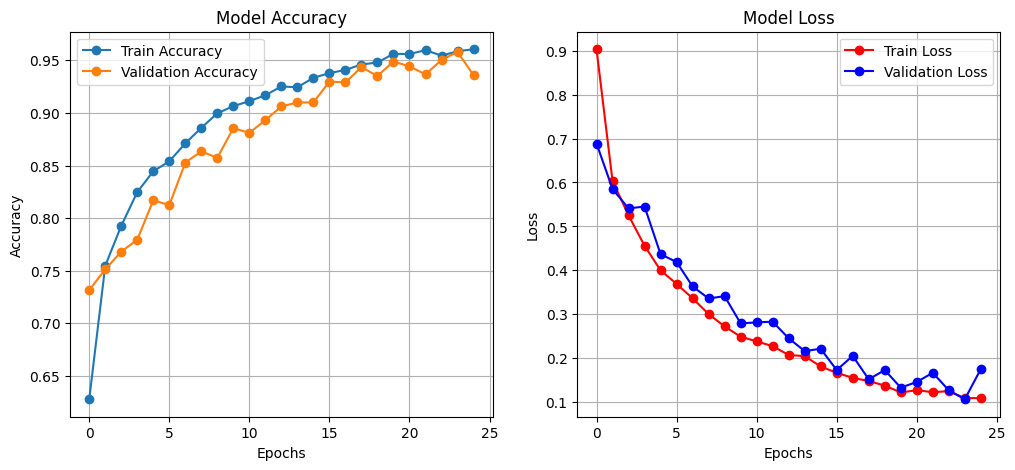

In [19]:
# Print final training and validation accuracy
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {final_train_acc:.2f}")
print(f"Final Validation Accuracy: {final_val_acc:.2f}")

# Plot training accuracy and validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o', color='blue')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()


STEP 8:FUNCTION TO TEST WITH SAMPLE IMAGES

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Predicted class: glioma with confidence: 99.98%


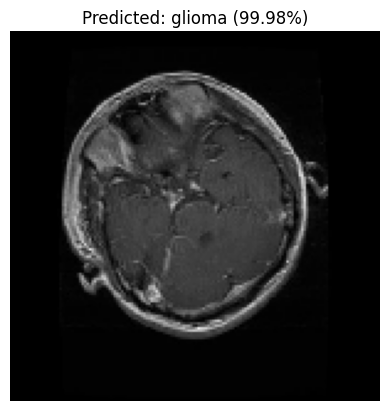

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted class: notumor with confidence: 99.18%


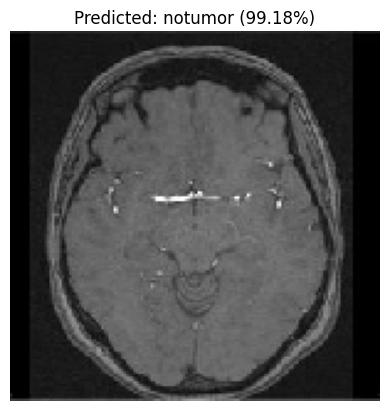

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted class: meningioma with confidence: 99.01%


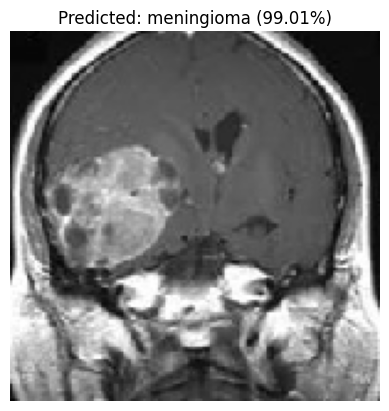

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted class: pituitary with confidence: 99.88%


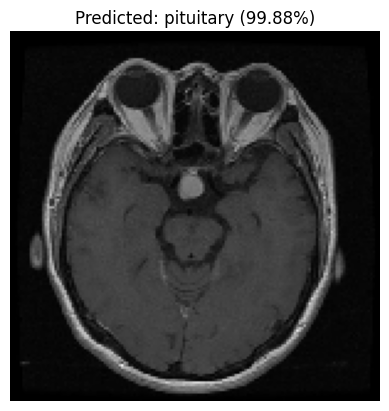

In [28]:
# Save the model
model.save('/content/brain_tumor_model.h5')

# Function to test with sample images
def predict_image(img_path):
    img = load_img(img_path, target_size=IMG_SIZE)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array)
    class_labels = list(train_generator.class_indices.keys())
    predicted_class = class_labels[np.argmax(predictions)]
    confidence = np.max(predictions) * 100
    print(f"Predicted class: {predicted_class} with confidence: {confidence:.2f}%")
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()

# Test the model with a sample image
predict_image('/content/brain_tumor_data/Testing/glioma/Te-glTr_0006.jpg')
predict_image('/content/brain_tumor_data/Testing/notumor/Te-no_0017.jpg')
predict_image('/content/brain_tumor_data/Testing/meningioma/Te-me_0022.jpg');
predict_image('/content/brain_tumor_data/Testing/pituitary/Te-pi_0036.jpg')

STEP 8: CONFUSION MATRIX

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━

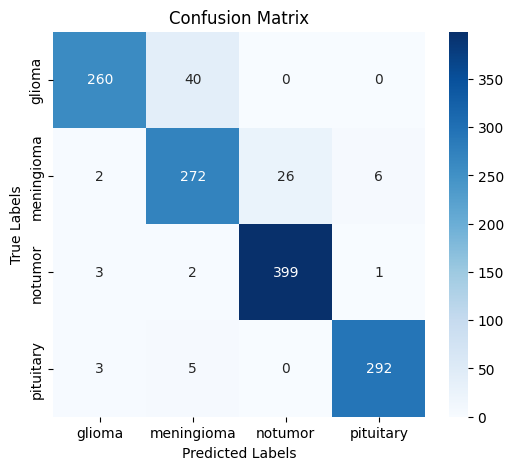

Class: glioma
Precision: 0.9701
Recall: 0.8667
F1-Score: 0.9155

Class: meningioma
Precision: 0.8527
Recall: 0.8889
F1-Score: 0.8704

Class: notumor
Precision: 0.9388
Recall: 0.9852
F1-Score: 0.9614

Class: pituitary
Precision: 0.9766
Recall: 0.9733
F1-Score: 0.9750



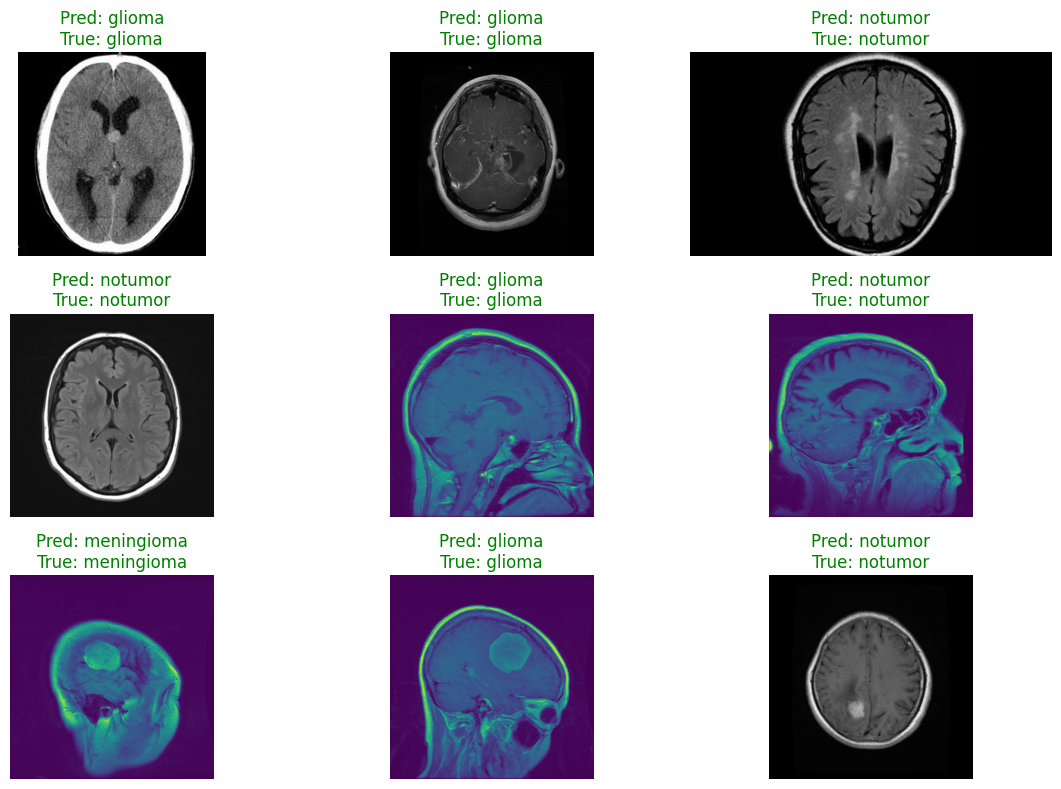

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import random

# Get the true labels and predicted labels
y_true = []
y_pred = []

for i in range(len(test_generator)):
    images, labels = test_generator[i]  # Get batch of images and labels
    preds = model.predict(images)  # Predict labels
    y_true.extend(np.argmax(labels, axis=1))  # True labels
    y_pred.extend(np.argmax(preds, axis=1))   # Predicted labels

# Get class labels
class_labels = list(train_generator.class_indices.keys())

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
# Print true labels with their predicted class
print("True Label  ->  Predicted Class")
for true, pred in zip(y_true[:20], y_pred[:20]):  # Display first 20 samples
    print(f"{class_labels[true]:<10} -> {class_labels[pred]}")
# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
#  Calculate precision, recall, and F1-score from the confusion matrix
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print precision, recall, and F1-score for each class
categories = list(train_generator.class_indices.keys())
for i, category in enumerate(categories):
    print(f"Class: {category}")
    print(f"Precision: {precision[i]:.4f}")
    print(f"Recall: {recall[i]:.4f}")
    print(f"F1-Score: {f1_score[i]:.4f}\n")

# Analyze sample images and their predictions
sample_indices = np.random.choice(len(y_true), 9, replace=False)
sample_images = [test_generator.filepaths[i] for i in sample_indices]
sample_true_labels = [categories[y_true[i]] for i in sample_indices]
sample_predictions = [categories[y_pred[i]] for i in sample_indices]

plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(sample_images[i])
    plt.imshow(img)
    if sample_predictions[i] == sample_true_labels[i]:
        plt.title(f"Pred: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}", color='green')
    else:
        plt.title(f"Pred: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}", color='red')
    plt.axis("off")
plt.tight_layout()
plt.show()


STEP 9:GRAD CAM VIEW

Auto-detected last conv layer: conv2d_14
GradCAM for image: Te-gl_0081.jpg (Class: glioma)


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_44']
Received: inputs=Tensor(shape=(1, 150, 150, 3))
  warnings.warn(msg)


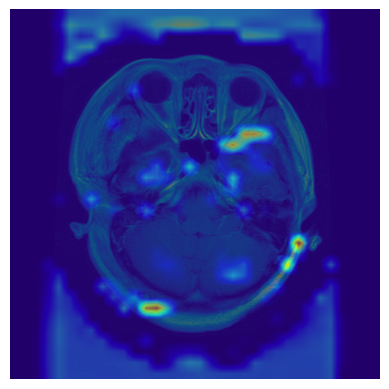

GradCAM for image: Te-no_0204.jpg (Class: notumor)


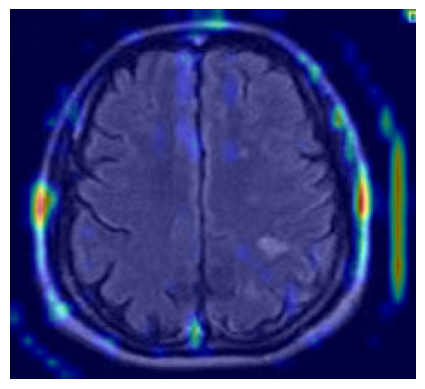

GradCAM for image: Te-pi_0167.jpg (Class: pituitary)


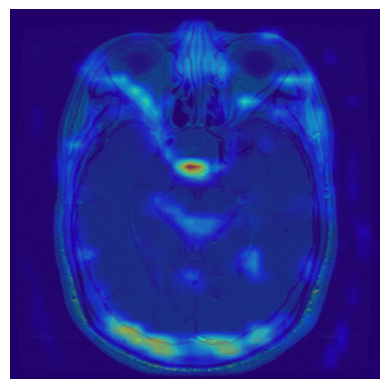

GradCAM for image: Te-me_0063.jpg (Class: meningioma)


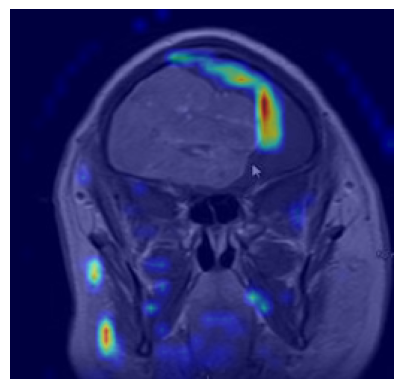

In [31]:
# === GradCAM Utility ===
def get_last_conv_layer(model):
    for layer in reversed(model.layers):
        if isinstance(layer, layers.Conv2D):
            return layer.name
    raise ValueError("No Conv2D layer found in model.")

last_conv_layer_name = get_last_conv_layer(model)
print(f"Auto-detected last conv layer: {last_conv_layer_name}")

def VizGradCAM(model, img_path, size=(150, 150)):
    img = preprocessing.image.load_img(img_path, target_size=size)
    img_array = preprocessing.image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    grad_model = models.Model(
        inputs=[model.input],
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(img_array)
        class_idx = np.argmax(predictions[0])
        class_channel = predictions[:, class_idx]

    grads = tape.gradient(class_channel, conv_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_output = conv_output[0]
    heatmap = tf.reduce_sum(pooled_grads * conv_output, axis=-1)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

    img = plt.imread(img_path)
    plt.imshow(img)

    heatmap = np.uint8(255 * heatmap)
    heatmap = np.expand_dims(heatmap, axis=-1)
    heatmap = tf.image.resize(heatmap, (img.shape[0], img.shape[1])).numpy()
    heatmap = np.squeeze(heatmap)

    plt.imshow(heatmap, cmap='jet', alpha=0.5)
    plt.axis('off')
    plt.show()


def visualize_random_images_with_gradcam(num_images=4):
    random_indices = np.random.choice(len(test_generator.filepaths), num_images, replace=False)
    for idx in random_indices:
        img_path = test_generator.filepaths[idx]
        print(f"GradCAM for image: {img_path.split('/')[-1]} (Class: {img_path.split('/')[-2]})")
        VizGradCAM(model, img_path)

visualize_random_images_with_gradcam()